In [5]:
import os
os.chdir("C:/Users/Victor/Documents/CS Masters/CS5242 - Neural Networks and Deep Learning/CS5242-Project")

In [6]:
# Imports
import os
import torch
import torch.optim as optim
import torch.nn as nn
import shutil
import numpy as np
import torchvision
import albumentations as A
import gc
import matplotlib.pyplot as plt

from data_augmentation import augmentation
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
from transformers import ViTForImageClassification
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
model.to(device)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

## Data Preperation

In [7]:
# Apply augmentation here
# remember to change input_folder and output_folder!!!
char_list = ['dori', 'lisa', 'amber', 'childe', 'venti', 'zhongli', 'eula', 'ganyu', 'hutao', 'yoimiya', 'raiden', 'nahida']
augmentation.process_folder(char_list, num_aug=3)

Processed 1.jpg_person_0.jpg
Processed 123.jpg_person_0.jpg
Processed 1234.jpg
Processed 1528299.jpg_person_0.jpg
Processed 1k1tus74c44c1.jpg_person_0.jpg
Processed 20240521_664c62af13e2b.jpg_person_0.jpg
Processed 20240521_664c62b0a10df.jpg_person_0.jpg
Processed 2d7e8fd5c08794cdb6efffb9d3e864f1_573116708228114109.jpg
Processed 470570.jpg
Processed 4d273b13111fd010b9d2ebc66d797027.jpg_person_0.jpg
Processed 4f743c664e576f0453a417a79fb223db_2156934232139002302.jpg_person_0.jpg
Processed 4l3uc8z96rz91.jpg_person_0.jpg
Processed 57002ey.jpg
Processed 5_f4b100cf-c9be-4efe-81e3-de6c9f1939b9.jpg_person_0.jpg
Processed 640x640q90.jpg
Processed 67087ef0efa502d7edb27ca561413c93.jpg_person_0.jpg
Processed 815818012ab7c5b5832be3ea2cbf994a_6081765440921617244.jpg_person_0.jpg
Processed 89c158a4ba8bc1638a057724a23c405a.jpg_person_0.jpg
Processed b05db2010dd6aa3bd72385a3bc176f54_1148165468859077393.jpg_person_0.jpg
Processed c29821593aeaf5490b122befc2f8a545_580631687357654309.jpg
Processed CGI209DR

In [8]:
# Target is on all the root directory for all the _extracted folders
dataset_dir = './dataset/augmented' # Whatever folder the augmented dataset is in
train_dir = './processed_splits/train'  # Destination for training set
test_dir = './processed_splits/test'    # Destination for test set
val_dir = './processed_splits/val'    # Destination for validation set

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

In [5]:
def train_test_val_split(dataset_dir, test_size, val_size):
    for character_folder in os.listdir(dataset_dir):
        character_path = os.path.join(dataset_dir, character_folder)

        if os.path.isdir(character_path):
            # Get all image filenames for the current character
            images = os.listdir(character_path)

            # Split into train+val and test sets
            train_val_images, test_images = train_test_split(images, test_size=test_size, random_state=5242)

            # Split train_val into train and val sets
            train_images, val_images = train_test_split(train_val_images, test_size=val_size, random_state=5242)

            # Create train, val, and test subfolders for the character
            train_character_dir = os.path.join(train_dir, character_folder)
            val_character_dir = os.path.join(val_dir, character_folder)
            test_character_dir = os.path.join(test_dir, character_folder)
            os.makedirs(train_character_dir, exist_ok=True)
            os.makedirs(val_character_dir, exist_ok=True)
            os.makedirs(test_character_dir, exist_ok=True)

            # Move training images
            for image in train_images:
                src_image_path = os.path.join(character_path, image)
                dst_image_path = os.path.join(train_character_dir, image)
                shutil.copy(src_image_path, dst_image_path)

            # Move validation images
            for image in val_images:
                src_image_path = os.path.join(character_path, image)
                dst_image_path = os.path.join(val_character_dir, image)
                shutil.copy(src_image_path, dst_image_path)

            # Move testing images
            for image in test_images:
                src_image_path = os.path.join(character_path, image)
                dst_image_path = os.path.join(test_character_dir, image)
                shutil.copy(src_image_path, dst_image_path)

            print(f'Successfully split {character_folder} into train/test/val sets.')

In [9]:
# Define split ratios
test_size = 0.15
val_size = 0.15

In [21]:
train_test_val_split(dataset_dir, test_size, val_size)

Successfully split amber_augmented into train/test/val sets.
Successfully split childe_augmented into train/test/val sets.
Successfully split dori_augmented into train/test/val sets.
Successfully split eula_augmented into train/test/val sets.
Successfully split ganyu_augmented into train/test/val sets.
Successfully split hutao_augmented into train/test/val sets.
Successfully split lisa_augmented into train/test/val sets.
Successfully split nahida_augmented into train/test/val sets.
Successfully split raiden_augmented into train/test/val sets.
Successfully split venti_augmented into train/test/val sets.
Successfully split yoimiya_augmented into train/test/val sets.
Successfully split zhongli_augmented into train/test/val sets.


In [10]:
# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = torchvision.datasets.ImageFolder(train_dir, transform=transform)
val_dataset = torchvision.datasets.ImageFolder(val_dir, transform=transform)

# Pass these datasets to DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

# Training

In [11]:
# Loss Function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False, maximize=False, foreach=None, capturable=False, differentiable=False, fused=None)

# Learning Rate Scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


In [12]:
def train(model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs=30, patience=5):
    best_val_accuracy = 0.0
    trigger_times = 0

    train_losses=[]
    val_losses=[]

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Training Phase
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in tqdm(train_loader, desc='Training', leave=False):
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs).logits
            
            # Labels for accuracy
            labels_copy = labels.clone()

            # Adjustments based on loss function
            if isinstance(criterion, nn.NLLLoss):
                outputs = nn.functional.log_softmax(outputs, dim=1)
            elif isinstance(criterion, nn.KLDivLoss):
                outputs = nn.functional.log_softmax(outputs, dim=1)
                labels = nn.functional.one_hot(labels, num_classes=12).float().to(device)
            elif isinstance(criterion, nn.MSELoss):
                outputs = nn.functional.softmax(outputs, dim=1)
                labels = nn.functional.one_hot(labels, num_classes=12).float().to(device)
            else:
                # For CrossEntropyLoss
                pass

            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels_copy.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        train_losses.append(epoch_loss)

        print(f'Training Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # Validation Phase
        model.eval()
        val_running_corrects = 0
        val_running_loss = 0
        
        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc='Validation', leave=False):
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs).logits

                # Labels for accuracy
                labels_copy = labels.clone()

                # Adjustments based on loss function
                if isinstance(criterion, nn.NLLLoss):
                    outputs = nn.functional.log_softmax(outputs, dim=1)
                elif isinstance(criterion, nn.KLDivLoss):
                    outputs = nn.functional.log_softmax(outputs, dim=1)
                    labels = nn.functional.one_hot(labels, num_classes=12).float().to(device)
                elif isinstance(criterion, nn.MSELoss):
                    outputs = nn.functional.softmax(outputs, dim=1)
                    labels = nn.functional.one_hot(labels, num_classes=12).float().to(device)
                else:
                    pass
                
                _, preds = torch.max(outputs, 1)
                
                val_running_loss+=loss.item()*inputs.size(0)
                val_running_corrects += torch.sum(preds == labels_copy.data)

        val_accuracy = val_running_corrects.double() / len(val_loader.dataset)
        val_loss = val_running_loss/len(val_loader.dataset)
        val_losses.append(val_loss)
        print(f'Validation Acc: {val_accuracy:.4f}')

        # Check for improvement
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), 'best_model.pth')
            print('Best model saved.')
            trigger_times = 0
        else:
            trigger_times += 1
            print(f'No improvement for {trigger_times} epoch(s).')

            if trigger_times >= patience:
                print('Early stopping triggered.')
                break

        # Step the scheduler
        scheduler.step()

    print(f'Training complete. Best Validation Accuracy: {best_val_accuracy:.4f}')

    return train_losses, val_losses

In [13]:
# Loss functions
loss_functions = {
    'MSELoss': nn.MSELoss(),  # Mean Squared Error Loss
    'KLDivLoss': nn.KLDivLoss(reduction='batchmean'),  # Kullback-Leibler Divergence Loss
    'CrossEntropyLoss': nn.CrossEntropyLoss(), # Cross Entropy Loss
    'NLLLoss': nn.NLLLoss(),  # Negative Log Likelihood Loss
}


In [14]:
def compareLossFunctions(loss_functions, train_dataset, val_dataset, device, num_epochs=30, patience=5):
    loss_results = {}

    for loss_function_name, criterion in loss_functions.items():
        print(f'\nTraining with loss function: {loss_function_name}')
        
        # Re-initialize model
        model = ViTForImageClassification.from_pretrained(
            'google/vit-base-patch16-224',
            num_labels=12,
            ignore_mismatched_sizes=True
        )
        model.to(device)
        
        optimizer = optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False, maximize=False, foreach=None, capturable=False, differentiable=False, fused=None)
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
        
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)
        
        # Collection of metrics required to see which loss function is the best
        train_losses,val_losses = train(model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs=30, patience=5)
        loss_results[loss_function_name]={'train':train_losses,'val':val_losses}

        del model

    return loss_results

In [15]:
loss_results = compareLossFunctions(loss_functions, train_dataset, val_dataset, device, num_epochs=30, patience=5)


Training with loss function: MSELoss


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([12]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([12, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
----------


Training Loss: 0.0681 Acc: 0.3161


Validation Acc: 0.5065
Best model saved.
Epoch 2/30
----------


Training Loss: 0.0404 Acc: 0.6506


Validation Acc: 0.7202
Best model saved.
Epoch 3/30
----------


Training Loss: 0.0300 Acc: 0.7504


Validation Acc: 0.7581
Best model saved.
Epoch 4/30
----------


Training Loss: 0.0230 Acc: 0.8167


Validation Acc: 0.8026
Best model saved.
Epoch 5/30
----------


Training Loss: 0.0207 Acc: 0.8308


Validation Acc: 0.8492
Best model saved.
Epoch 6/30
----------


Training Loss: 0.0169 Acc: 0.8651


Validation Acc: 0.7874
No improvement for 1 epoch(s).
Epoch 7/30
----------


Training Loss: 0.0177 Acc: 0.8547


Validation Acc: 0.8004
No improvement for 2 epoch(s).
Epoch 8/30
----------


Training Loss: 0.0152 Acc: 0.8749


Validation Acc: 0.8395
No improvement for 3 epoch(s).
Epoch 9/30
----------


Training Loss: 0.0140 Acc: 0.8902


Validation Acc: 0.8536
Best model saved.
Epoch 10/30
----------


Training Loss: 0.0118 Acc: 0.9069


Validation Acc: 0.8655
Best model saved.
Epoch 11/30
----------


Training Loss: 0.0059 Acc: 0.9537


Validation Acc: 0.9056
Best model saved.
Epoch 12/30
----------


Training Loss: 0.0035 Acc: 0.9741


Validation Acc: 0.9089
Best model saved.
Epoch 13/30
----------


Training Loss: 0.0027 Acc: 0.9800


Validation Acc: 0.9089
No improvement for 1 epoch(s).
Epoch 14/30
----------


Training Loss: 0.0023 Acc: 0.9829


Validation Acc: 0.9154
Best model saved.
Epoch 15/30
----------


Training Loss: 0.0019 Acc: 0.9855


Validation Acc: 0.9132
No improvement for 1 epoch(s).
Epoch 16/30
----------


Training Loss: 0.0016 Acc: 0.9882


Validation Acc: 0.9154
No improvement for 2 epoch(s).
Epoch 17/30
----------


Training Loss: 0.0014 Acc: 0.9884


Validation Acc: 0.9143
No improvement for 3 epoch(s).
Epoch 18/30
----------


Training Loss: 0.0013 Acc: 0.9898


Validation Acc: 0.9100
No improvement for 4 epoch(s).
Epoch 19/30
----------


Training Loss: 0.0011 Acc: 0.9914


Validation Acc: 0.9111
No improvement for 5 epoch(s).
Early stopping triggered.
Training complete. Best Validation Accuracy: 0.9154

Training with loss function: KLDivLoss


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([12]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([12, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
----------


Training Loss: 1.0290 Acc: 0.6625


Validation Acc: 0.7993
Best model saved.
Epoch 2/30
----------


Training Loss: 0.5090 Acc: 0.8369


Validation Acc: 0.8134
Best model saved.
Epoch 3/30
----------


Training Loss: 0.4013 Acc: 0.8696


Validation Acc: 0.8829
Best model saved.
Epoch 4/30
----------


Training Loss: 0.2859 Acc: 0.9067


Validation Acc: 0.8341
No improvement for 1 epoch(s).
Epoch 5/30
----------


Training Loss: 0.2837 Acc: 0.9053


Validation Acc: 0.8970
Best model saved.
Epoch 6/30
----------


Training Loss: 0.1645 Acc: 0.9494


Validation Acc: 0.9067
Best model saved.
Epoch 7/30
----------


Training Loss: 0.1715 Acc: 0.9429


Validation Acc: 0.8818
No improvement for 1 epoch(s).
Epoch 8/30
----------


Training Loss: 0.1761 Acc: 0.9437


Validation Acc: 0.8872
No improvement for 2 epoch(s).
Epoch 9/30
----------


Training Loss: 0.1443 Acc: 0.9516


Validation Acc: 0.8753
No improvement for 3 epoch(s).
Epoch 10/30
----------


Training Loss: 0.1403 Acc: 0.9520


Validation Acc: 0.8829
No improvement for 4 epoch(s).
Epoch 11/30
----------


Training Loss: 0.0305 Acc: 0.9900


Validation Acc: 0.9306
Best model saved.
Epoch 12/30
----------


Training Loss: 0.0052 Acc: 0.9994


Validation Acc: 0.9295
No improvement for 1 epoch(s).
Epoch 13/30
----------


Training Loss: 0.0030 Acc: 0.9998


Validation Acc: 0.9306
No improvement for 2 epoch(s).
Epoch 14/30
----------


Training Loss: 0.0022 Acc: 0.9996


Validation Acc: 0.9306
No improvement for 3 epoch(s).
Epoch 15/30
----------


Training Loss: 0.0017 Acc: 0.9998


Validation Acc: 0.9306
No improvement for 4 epoch(s).
Epoch 16/30
----------


Training Loss: 0.0014 Acc: 0.9998


Validation Acc: 0.9306
No improvement for 5 epoch(s).
Early stopping triggered.
Training complete. Best Validation Accuracy: 0.9306

Training with loss function: CrossEntropyLoss


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([12]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([12, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
----------


Training Loss: 1.4378 Acc: 0.5037


Validation Acc: 0.7484
Best model saved.
Epoch 2/30
----------


Training Loss: 0.6548 Acc: 0.7920


Validation Acc: 0.7744
Best model saved.
Epoch 3/30
----------


Training Loss: 0.4937 Acc: 0.8398


Validation Acc: 0.8102
Best model saved.
Epoch 4/30
----------


Training Loss: 0.3436 Acc: 0.8843


Validation Acc: 0.8308
Best model saved.
Epoch 5/30
----------


Training Loss: 0.3093 Acc: 0.8927


Validation Acc: 0.8200
No improvement for 1 epoch(s).
Epoch 6/30
----------


Training Loss: 0.2546 Acc: 0.9157


Validation Acc: 0.8677
Best model saved.
Epoch 7/30
----------


Training Loss: 0.2196 Acc: 0.9247


Validation Acc: 0.8807
Best model saved.
Epoch 8/30
----------


Training Loss: 0.1723 Acc: 0.9457


Validation Acc: 0.8438
No improvement for 1 epoch(s).
Epoch 9/30
----------


Training Loss: 0.1646 Acc: 0.9451


Validation Acc: 0.8633
No improvement for 2 epoch(s).
Epoch 10/30
----------


Training Loss: 0.1754 Acc: 0.9425


Validation Acc: 0.8677
No improvement for 3 epoch(s).
Epoch 11/30
----------


Training Loss: 0.0511 Acc: 0.9867


Validation Acc: 0.9121
Best model saved.
Epoch 12/30
----------


Training Loss: 0.0133 Acc: 0.9976


Validation Acc: 0.9154
Best model saved.
Epoch 13/30
----------


Training Loss: 0.0064 Acc: 0.9990


Validation Acc: 0.9187
Best model saved.
Epoch 14/30
----------


Training Loss: 0.0040 Acc: 0.9996


Validation Acc: 0.9187
No improvement for 1 epoch(s).
Epoch 15/30
----------


Training Loss: 0.0030 Acc: 0.9998


Validation Acc: 0.9208
Best model saved.
Epoch 16/30
----------


Training Loss: 0.0023 Acc: 0.9996


Validation Acc: 0.9208
No improvement for 1 epoch(s).
Epoch 17/30
----------


Training Loss: 0.0018 Acc: 0.9998


Validation Acc: 0.9208
No improvement for 2 epoch(s).
Epoch 18/30
----------


Training Loss: 0.0015 Acc: 0.9998


Validation Acc: 0.9208
No improvement for 3 epoch(s).
Epoch 19/30
----------


Training Loss: 0.0014 Acc: 0.9998


Validation Acc: 0.9208
No improvement for 4 epoch(s).
Epoch 20/30
----------


Training Loss: 0.0016 Acc: 0.9998


Validation Acc: 0.9219
Best model saved.
Epoch 21/30
----------


Training Loss: 0.0010 Acc: 0.9998


Validation Acc: 0.9219
No improvement for 1 epoch(s).
Epoch 22/30
----------


Training Loss: 0.0010 Acc: 0.9998


Validation Acc: 0.9219
No improvement for 2 epoch(s).
Epoch 23/30
----------


Training Loss: 0.0009 Acc: 0.9998


Validation Acc: 0.9219
No improvement for 3 epoch(s).
Epoch 24/30
----------


Training Loss: 0.0009 Acc: 0.9998


Validation Acc: 0.9219
No improvement for 4 epoch(s).
Epoch 25/30
----------


Training Loss: 0.0009 Acc: 0.9998


Validation Acc: 0.9219
No improvement for 5 epoch(s).
Early stopping triggered.
Training complete. Best Validation Accuracy: 0.9219

Training with loss function: NLLLoss


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([12]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([12, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
----------


Training Loss: 1.2880 Acc: 0.5700


Validation Acc: 0.7668
Best model saved.
Epoch 2/30
----------


Training Loss: 0.6697 Acc: 0.7794


Validation Acc: 0.7798
Best model saved.
Epoch 3/30
----------


Training Loss: 0.4612 Acc: 0.8549


Validation Acc: 0.7744
No improvement for 1 epoch(s).
Epoch 4/30
----------


Training Loss: 0.3457 Acc: 0.8904


Validation Acc: 0.8384
Best model saved.
Epoch 5/30
----------


Training Loss: 0.3082 Acc: 0.8973


Validation Acc: 0.8688
Best model saved.
Epoch 6/30
----------


Training Loss: 0.2147 Acc: 0.9275


Validation Acc: 0.8557
No improvement for 1 epoch(s).
Epoch 7/30
----------


Training Loss: 0.2543 Acc: 0.9186


Validation Acc: 0.8796
Best model saved.
Epoch 8/30
----------


Training Loss: 0.2030 Acc: 0.9367


Validation Acc: 0.8948
Best model saved.
Epoch 9/30
----------


Training Loss: 0.1981 Acc: 0.9337


Validation Acc: 0.8590
No improvement for 1 epoch(s).
Epoch 10/30
----------


Training Loss: 0.1741 Acc: 0.9443


Validation Acc: 0.8297
No improvement for 2 epoch(s).
Epoch 11/30
----------


Training Loss: 0.0499 Acc: 0.9865


Validation Acc: 0.9284
Best model saved.
Epoch 12/30
----------


Training Loss: 0.0110 Acc: 0.9988


Validation Acc: 0.9252
No improvement for 1 epoch(s).
Epoch 13/30
----------


Training Loss: 0.0062 Acc: 0.9992


Validation Acc: 0.9306
Best model saved.
Epoch 14/30
----------


Training Loss: 0.0044 Acc: 0.9992


Validation Acc: 0.9328
Best model saved.
Epoch 15/30
----------


Training Loss: 0.0028 Acc: 0.9994


Validation Acc: 0.9317
No improvement for 1 epoch(s).
Epoch 16/30
----------


Training Loss: 0.0021 Acc: 0.9994


Validation Acc: 0.9338
Best model saved.
Epoch 17/30
----------


Training Loss: 0.0017 Acc: 0.9998


Validation Acc: 0.9328
No improvement for 1 epoch(s).
Epoch 18/30
----------


Training Loss: 0.0013 Acc: 0.9998


Validation Acc: 0.9371
Best model saved.
Epoch 19/30
----------


Training Loss: 0.0013 Acc: 0.9998


Validation Acc: 0.9338
No improvement for 1 epoch(s).
Epoch 20/30
----------


Training Loss: 0.0013 Acc: 0.9996


Validation Acc: 0.9349
No improvement for 2 epoch(s).
Epoch 21/30
----------


Training Loss: 0.0010 Acc: 0.9996


Validation Acc: 0.9371
No improvement for 3 epoch(s).
Epoch 22/30
----------


Training Loss: 0.0009 Acc: 0.9998


Validation Acc: 0.9371
No improvement for 4 epoch(s).
Epoch 23/30
----------


Training Loss: 0.0008 Acc: 1.0000


Validation Acc: 0.9382
Best model saved.
Epoch 24/30
----------


Training Loss: 0.0008 Acc: 0.9998


Validation Acc: 0.9382
No improvement for 1 epoch(s).
Epoch 25/30
----------


Training Loss: 0.0008 Acc: 0.9998


Validation Acc: 0.9382
No improvement for 2 epoch(s).
Epoch 26/30
----------


Training Loss: 0.0008 Acc: 0.9998


Validation Acc: 0.9382
No improvement for 3 epoch(s).
Epoch 27/30
----------


Training Loss: 0.0008 Acc: 0.9998


Validation Acc: 0.9382
No improvement for 4 epoch(s).
Epoch 28/30
----------


Training Loss: 0.0008 Acc: 0.9998


Validation Acc: 0.9382
No improvement for 5 epoch(s).
Early stopping triggered.
Training complete. Best Validation Accuracy: 0.9382


In [25]:
import gc
torch.cuda.empty_cache()
gc.collect()

13244

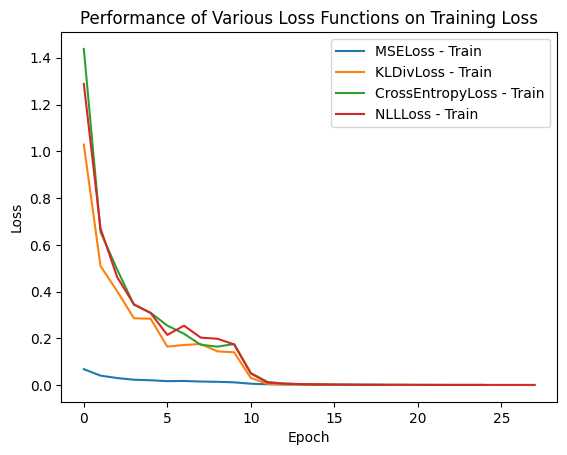

In [36]:
for loss_name,losses in loss_results.items():
    plt.plot(losses['train'],label=f'{loss_name} - Train')


plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Performance of Various Loss Functions on Training Loss')
plt.legend()
plt.savefig('loss_functions_train.png')
plt.show()


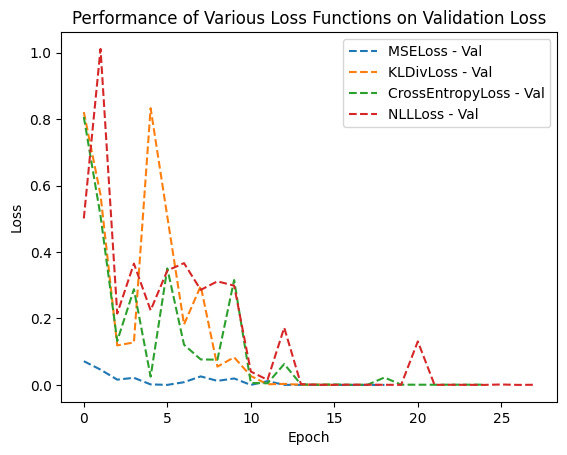

In [34]:
for loss_name,losses in loss_results.items():
    plt.plot(losses['val'],linestyle='--',label=f'{loss_name} - Val')


plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Performance of Various Loss Functions on Validation Loss')
plt.legend()
plt.savefig('loss_functions_val.png')
plt.show()


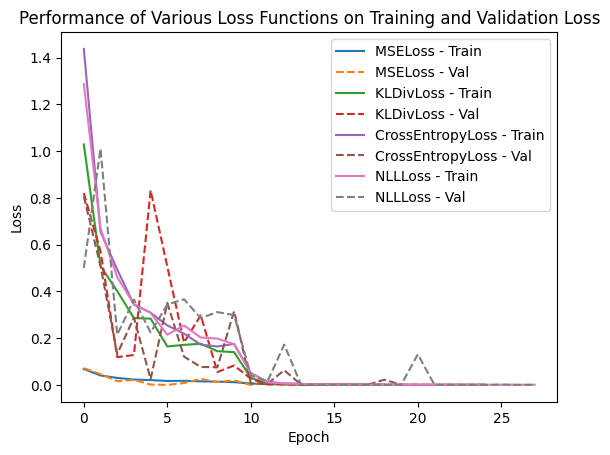

In [35]:
for loss_name,losses in loss_results.items():
    plt.plot(losses['train'],label=f'{loss_name} - Train')
    plt.plot(losses['val'],linestyle='--',label=f'{loss_name} - Val')


plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Performance of Various Loss Functions on Training and Validation Loss')
plt.legend()
plt.savefig('loss_functions_comparison.png')
plt.show()


## Evaluation

In [ ]:
train(model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs=30, patience=5)

In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()

## Evaluation

In [36]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
model.load_state_dict(torch.load('best_model.pth'))
model = model.to(device)

In [ ]:
model.eval()

In [39]:
test_dataset = torchvision.datasets.ImageFolder(test_dir, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [40]:
def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc='Evaluating', leave=False):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs).logits
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_accuracy = accuracy_score(all_labels, all_preds)
    print(f'Test Accuracy: {test_accuracy:.4f}')

    # Classification report
    class_names = test_dataset.classes
    print('Classification Report:')
    print(classification_report(all_labels, all_preds, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', 
                xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

Test Accuracy: 0.8811
Classification Report:
                   precision    recall  f1-score   support

  amber_augmented       0.82      0.88      0.85        68
 childe_augmented       0.87      0.85      0.86        72
   dori_augmented       0.88      0.90      0.89        68
   eula_augmented       0.91      0.87      0.89        61
  ganyu_augmented       0.91      0.88      0.89        56
  hutao_augmented       0.85      0.78      0.81        64
   lisa_augmented       0.97      0.93      0.95        68
 nahida_augmented       0.88      0.87      0.87        68
 raiden_augmented       0.89      0.96      0.92        68
  venti_augmented       0.86      0.90      0.88        70
yoimiya_augmented       0.82      0.87      0.84        68
zhongli_augmented       0.92      0.90      0.91        68

         accuracy                           0.88       799
        macro avg       0.88      0.88      0.88       799
     weighted avg       0.88      0.88      0.88       799



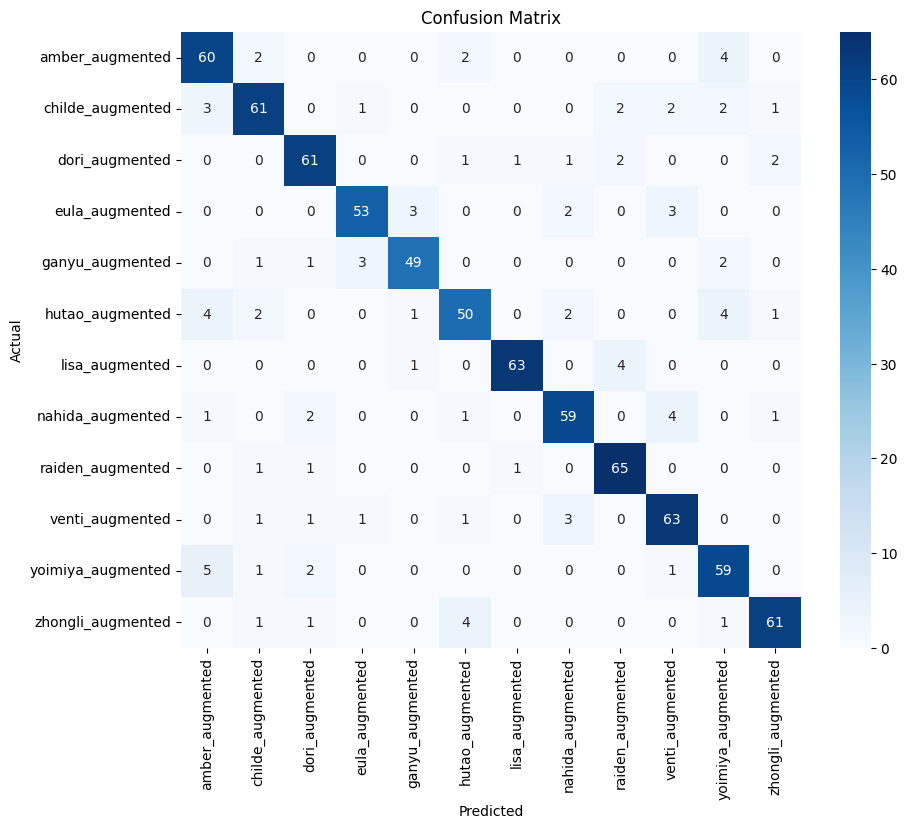

In [41]:
evaluate_model(model, test_loader, device)